<a href="https://colab.research.google.com/github/Oseiasdfarias/Control_Sys_Python/blob/main/Controle_Malha_Fechada_circuito_RC/controle_Malha_Fechada_CircuitoRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**CONTROLE EM MALHA FECHADA DE UM CIRCUITO RC**<center/>
# <center>**SIMULAÇÃO EM PYTHON**<center/>

<br/>

>> Controle em Malha Fechada de um Circuito RC Usando a **Liguagem de Programação Python** e a **Biblioteca de Controle (Control)**

# **Diagrama do Circuito RC**

 <br/> <br/> 

<center><img src="https://github.com/Oseiasdfarias/Control_Sys_Python/blob/main/Controle_Malha_Fechada_circuito_RC/sistemas_de_controle_motor.png?raw=true" width="900"></center>

 <br/> <br/> 

## **Modelo Matemático do Circuito RC**

$$v_o = v_c = v_i - v_R$$

<br/>

$$v_R = Ri_c = RC\dfrac{dv_c}{dt}$$

<br/>

$$v_o = v_i - RC\dfrac{dv_o}{dt}$$

<br/>

$$v_i = RC\dfrac{dv_o}{dt} + v_o$$

<br/>

### **Aplicando a Transformada de Laplace**

$$v_i = RCsv_o + v_o$$

<br/>

### **Função de Transferência do Circuito RC com saída no Capacitor**
<br/>

$$\dfrac{v_o}{v_i} = \dfrac{1}{(1 + RCs)}$$



<br/>
<br/>

---

<br/>
<br/>





# **CONTROLE EM MALHA FECHADA DO CIRCUITO RC**

<br/><br/><br/>

<center><img src="https://github.com/Oseiasdfarias/Control_Sys_Python/blob/main/Controle_Malha_Fechada_circuito_RC/sistemas_de_controle_CIRCUITOrc.png?raw=true" width="900"></center>

<br/><br/>

> **Onde:**
>> Modelo do Circuito RC: 
$$H(s) = \dfrac{5}{s + 5}$$

>> Sensor:
$$P(s) = 1$$

>> Controlador:
$$C(s) = K$$


<br/>

> ### **Aplicando a Teoria de Controle em Malha Fechada**
> Função de **Transferência Geral para o Sistema em Malha Fechada** é dada por:

<br/>

$$G(s) = \dfrac{C(s)H(s)}{1 + C(s)H(s)P(s)}$$

<br/>

<br/>


> Substituindo os valores temos:

<br/>


$$G(s) = \dfrac{KH(s)}{1 + KH(s)P(s)}$$



<br/>

$$G(s) = \dfrac{K\dfrac{5}{s + 5}}{1 + K\dfrac{5 }{s + 5}1}$$

<br/>
<br/>

> Simplificando a equação, temos:
<br/>
<br/>

$$G(s) = \dfrac{\dfrac{5K}{s + 5}}{1 + \dfrac{5K}{s + 5}}$$

<br/>
<br/>

> Aplicar as propriedades das frações:$\quad \frac{\frac{a}{b}}{c}=\frac{a}{b\cdot \:c}$
<br/>
<br/>

$$G(s) =\frac{5K}{\left(s+5\right)\left(1+\frac{5K}{s+5}\right)}$$

<br/>
<br/>

> Simplificando  $(1+\frac{5K}{s+5})$
<br/>

$$(\frac{s+5+5K}{s+5})$$

> Substituindo na equação x:

<br/>
<br/>

$$G(s) =\frac{5K}{\left(s+5\right)(\frac{s+5+5K}{s+5})}$$

<br/>
<br/>

> **Função de Transferência em Malha Fechada** do nosso sistema de Controle é dada por:

<br/>
<br/>

$$G(s) =\frac{5K}{s+5+5K}$$

<br/>
<br/>
<br/>

---
---

<br/>
<br/>
<br/>

# <center>**SIMULAÇÃO COM PYTHON**<center/>

### **Instalando a Biblioteca Control**


In [ ]:
! pip3 install control

     |████████████████████████████████| 339 kB 28.0 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=13a3d2b7748ef3d21fd5e33bf79e0accc4c8b62a5aad876b25d530d67a4a4f74
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


### **Importando as Bibliotecas necessárias para a simulação**

In [ ]:
import control as ctl 
import matplotlib.pyplot as plt
import numpy as np


### **Código de Simulação**

In [ ]:
# Variáveis da Simulação
R = 20.0e3
C = 10.0e-6
tau = R*C
Temp_simu = 2.0


def Simulacao_RC(K_p = 3.0):
  # Cria a Função de Transferência em Malha Aberta
  numerador = [1/tau]
  denominador = [1.0, 1/tau]
  H_s = ctl.tf(numerador, denominador)
  print(f"\n\n> Função de Transferência em Malha Aberta:\n {H_s}")

  # Cria a Função de Transferência do Controlador
  C_s=ctl.tf([K_p],[1.])
  print(f"\n> Função de Transferência do Controlador:\n {C_s}")

  # Cria a Função de Transferência do Sensor
  P_s=ctl.tf([1.],[1.])

  # Função de Transferência em Malha Fechada
  # G1_s=(C_s*H_s)/(1+C_s*H_s*P_s)
  G_s=ctl.series(C_s, H_s);
  G1_s=ctl.feedback(G_s, P_s, sign=-1);
  print(f"\n> Função de Transferência em Malha fechada:\n {G1_s}")

  # Calcula a resposta ao Degrau Unitário
  T_mf, yout_mf = ctl.step_response(G1_s, Temp_simu)

  # Plotando a resposta ao Degrau usando o metodo plt.plot() da biblioteca matplotlib
  plt.figure(figsize=(15, 7))
  plt.plot(T_mf, yout_mf, linewidth = 1.2)

  # Plotando o degrau unitário
  Temp_deg = np.linspace(-0.2, Temp_simu, 1000)
  degrau = np.ones_like(Temp_deg)
  degrau[Temp_deg < 0] = 0
  plt.plot(Temp_deg, degrau, color = "r", linestyle = "--", linewidth = 1.2)
  if K_p > 0:
    plt.xticks(np.linspace(0, 2, 20))
    plt.yticks(np.linspace(0, 1, 20))

  # Customizando a figura com Titulo,  Títulos nos eixos, Legenda e Grid
  plt.title("Circuito RC - Resposta ao Degrau em Malha Fechada", fontweight="bold", fontsize =  17)
  plt.ylabel("Tensão no Capacitor (V)", fontweight="bold", fontsize = 14)
  plt.xlabel("Tempo (s)", fontweight="bold", fontsize = 14)
  plt.legend(["Resposta ao Degrau", "Degrau Unitário"], fontsize = 14)
  #plt.grid()
  plt.show()






> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5


> Função de Transferência do Controlador:
 
3
-
1


> Função de Transferência em Malha fechada:
 
  15
------
s + 20



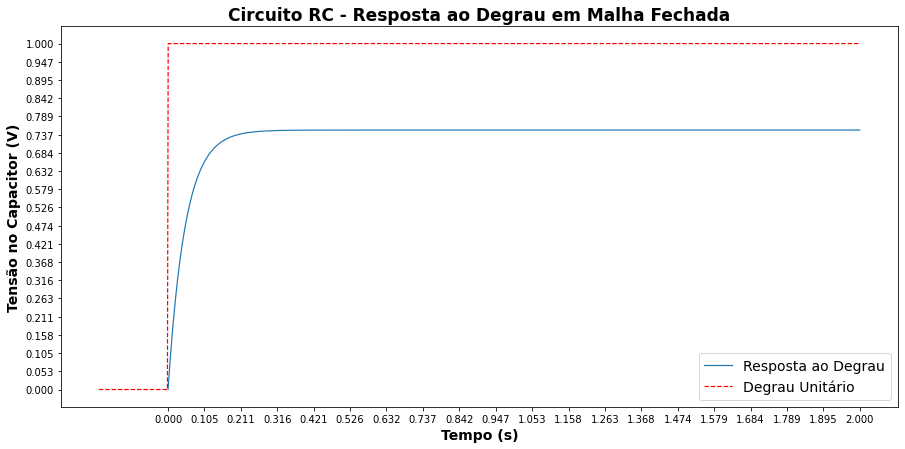

In [ ]:
Simulacao_RC()



> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5


> Função de Transferência do Controlador:
 
4
-
1


> Função de Transferência em Malha fechada:
 
  20
------
s + 25



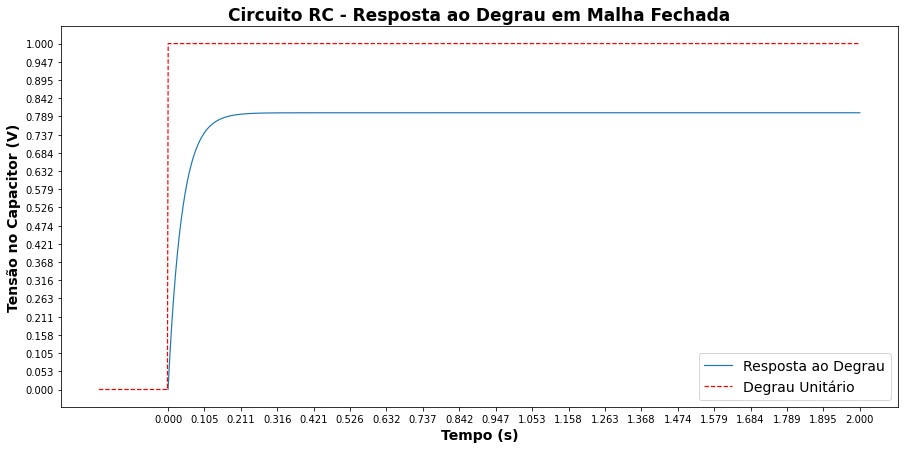

In [ ]:
Simulacao_RC(K_p = 4.0)



> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5


> Função de Transferência do Controlador:
 
-1
--
1


> Função de Transferência em Malha fechada:
 
-5
--
s



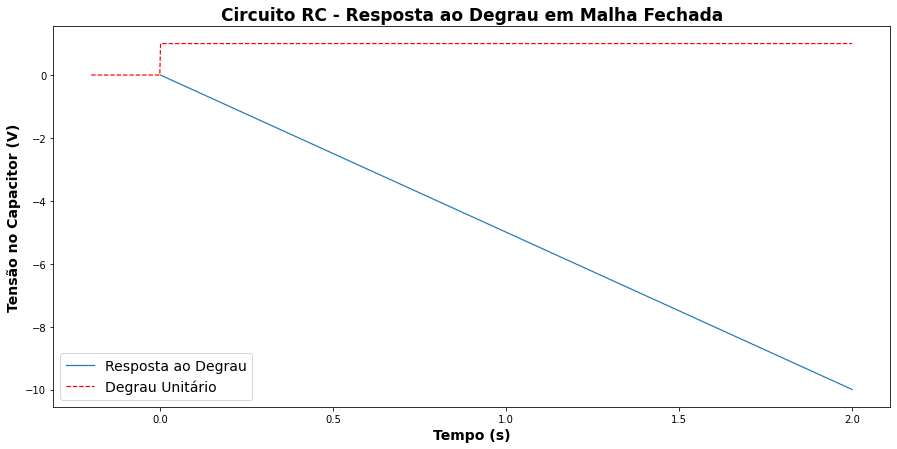

In [ ]:
Simulacao_RC(K_p = -1.0)



> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5


> Função de Transferência do Controlador:
 
-5
--
1


> Função de Transferência em Malha fechada:
 
 -25
------
s - 20



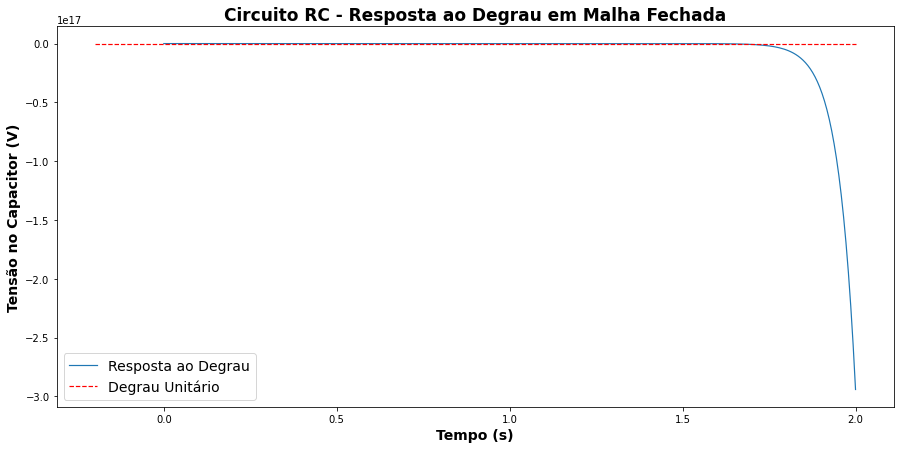

In [ ]:
Simulacao_RC(K_p = -5.0)